In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2025-04-18 16:51:42.224667: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-18 16:51:42.257280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745013102.293622    9156 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745013102.307924    9156 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745013102.337593    9156 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[3]])

print(decoded_review)

? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prota

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]  = 1.
    return results

In [3]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers

In [6]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

/home/stlso/tf_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745012567.632520    7409 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1519 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 4GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


I0000 00:00:1745012572.396950    7473 service.cc:152] XLA service 0x7f6790004d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745012572.397041    7473 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 4GB Laptop GPU, Compute Capability 8.6
2025-04-18 16:42:52.451040: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745012572.635817    7473 cuda_dnn.cc:529] Loaded cuDNN version 90800
I0000 00:00:1745012573.846957    7473 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step - acc: 0.5701 - loss: 0.7140 - val_acc: 0.8343 - val_loss: 0.6077
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - acc: 0.7316 - loss: 0.5992 - val_acc: 0.8654 - val_loss: 0.4919
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - acc: 0.7958 - loss: 0.5133 - val_acc: 0.8709 - val_loss: 0.4228
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - acc: 0.8397 - loss: 0.4508 - val_acc: 0.8802 - val_loss: 0.3722
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.8694 - loss: 0.4021 - val_acc: 0.8834 - val_loss: 0.3439
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.8930 - loss: 0.3599 - val_acc: 0.8781 - val_loss: 0.3465
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - acc: 0.9031 - loss: 0.3331 - val_acc: 0.8880 - val_loss: 0.3223
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - acc: 0.9151 - loss: 0.3071 - val_acc: 0.8896 - val_loss: 0.3204
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - acc: 0.9242 - loss: 

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20 + 1)

<function matplotlib.pyplot.show(close=None, block=None)>

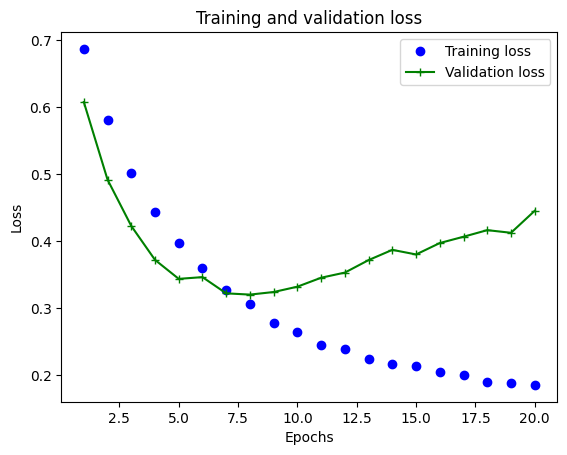

In [11]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, marker='+', color='g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [6]:
from keras import regularizers

model2 = models.Sequential()
model2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))


from tensorflow.keras.optimizers import RMSprop

model2.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# model2.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['acc'])

print("hello")

/home/stlso/tf_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745013170.764495    9156 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1519 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 4GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


hello


In [9]:
model_history = model2.fit(x_train,
                    y_train,
                    epochs = 10,
                    batch_size=512)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9308 - loss: 0.2567
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9303 - loss: 0.2592
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9335 - loss: 0.2538
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9369 - loss: 0.2441
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9423 - loss: 0.2330
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9355 - loss: 0.2377
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9389 - loss: 0.2301
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9438 - loss: 0.2272
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9447 - loss: 0.2248
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9448 - loss: 0.2177


In [10]:
 print(model2.evaluate(x_test, y_test))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8751 - loss: 0.4271
[0.42361530661582947, 0.8755199909210205]
